### **Question 1**

**1a)** The **logistic distribution** with location parameter $\mu\in\mathbb{R}$ and scale parameter $\sigma>0$ is defined by the cumulative distribution function
$$F(x)=\frac{1}{1+\exp(-(x-\mu)/\sigma)}$$
for any $x\in\mathbb{R}$. 

Write a Python function to generate $M$ simulations of the logistic distribution by the inverse transform sampling method. 

The three input parameters of the Python function are $M$, $\mu$ and $\sigma$. [5 points]  

**1b)** The **Lomax distribution** with shape parameter $p>0$ and scale parameter $\sigma>0$ is defined by the probability distribution function
$$f(x)=\frac{p}{\sigma}\left(1+\frac{x}{\sigma}\right)^{-(p+1)}$$
for any $x\geq0$ (and zero otherwise). 

Find the cumulative distribution function of the Lomax distribution (pay attention to the constant term) and explain how to simulate the Lomax distribution by inverse transform sampling. 

Implement this method in Python; 

the three input parameters of the Python function are the number of simulations $M$, the shape parameter $p$ and the scale parameter $\sigma$. [5 points]

---

#### *1a)*

Set $u = F(x)$, then:
$$
u=\frac{1}{1+\exp(-(x-\mu)/\sigma)}
$$
After rearranging,
$$
F^{-1}(U) = x = \mu+\sigma\ln\left(\frac{U}{1-U}\right)
$$
where $U \sim \text{Uniform}(0, 1)$

#### *1b)*

The Cumulative distribution function, CDF, $F(X)$, $x \geqslant 0$:

$$
F(x) = \int_0^x f(t) \, dt = \int_0^x \frac{p}{\sigma}\left(1 + \frac{t}{\sigma}\right)^{-(p + 1)} dt
$$
Let $u = 1 + \frac{t}{\sigma}$, then $du = \frac{1}{\sigma}dt$, and, $t\in(0, x) \implies u \in (1, 1 + \frac{x}{\sigma})$

$$
\begin{aligned}
F(x) & = \int_1^{1+\frac{x}{\sigma}}pu^{-(p+1)} \, du = p\int_1^{1+\frac{x}{\sigma}}u^{-(p+1)} \, du \\
& = p\left[-\frac{1}{p}u^{-p}\right]_1^{1+\frac{x}{\sigma}} = -\left[u^{-p}\right]_1^{1+\frac{x}{\sigma}} = -\left[\left(1+\frac{x}{\sigma}\right)^{-p}-1^{-p}\right]\\
& = 1-\left(1+\frac{x}{\sigma}\right)^{-p}
\end{aligned}
$$

Thus, the CDF of Lomax distribution is:

$$
F(x)=1-\left(1+\frac{x}{\sigma}\right)^{-p},\quad x\geq0
$$

> Remark:
> When $x = 0$, $F(0) = 0$; when $x\to\infin$, $F(x)\to 1$

The inverse transform sampling method:

Assume that:

$$
u = F(x) = 1-\left(1+\frac{x}{\sigma}\right)^{-p}
$$

After rearranging, we have:

$$
F^{-1}(u) = x = \sigma\left[(1-u)^{-\frac{1}{p}}-1\right]
$$

where $u \sim \text{Uniform}(0, 1)$





In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, expon, norm

# 1a)
def logistic_inverse_transform(M, mu, sigma) -> np.ndarray:
    """
    M: Number of simulations
    mu: Location parameter
    sigma: Scale parameter
    
    np.ndarray
        Array of size M containing samples from the Logistic distribution
    """
    # u = np.random.uniform(0, 1, M)
    u = uniform.rvs(size = M)
    u = np.clip(u, 1e-10, 1 - 1e-10)    # Avoid log(0)
    return mu + sigma * np.log(u / (1 - u))

# 1b)
def lomax_inverse_transform(M, p, sigma) -> np.ndarray:
    """
    M: Number of simulations
    p: Shape parameter
    sigma: Scale parameter
    
    np.ndarray
        Array of size M containing samples from the Lomax distribution
    """
    # u = np.random.uniform(0, 1, M)
    u = uniform.rvs(size = M)
    u = np.clip(u, 1e-10, 1 - 1e-10)    # Avoid division by zero
    return sigma * ( (1 - u) ** (- 1 / p) - 1 )

# Plot
def plot_inverse_transform(samples, title) -> None:
    """
    samples: Array of samples to plot
    title: Title for the plot
    """    
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins = 100, density = True, alpha = 0.6)
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.grid()
    plt.show()

# x = logistic_inverse_transform(100_000, 25, 10)
# plot_inverse_transform(x, "Logistic Distribution Samples")
# x = lomax_inverse_transform(100_000, 5, 5)
# plot_inverse_transform(x, "Lomax Distribution Samples")

---

### **Question 2** 

Let $\mathcal{D}\subseteq\mathbb{R}$ be a real domain, let $X$ be a continuous random variables taking values in $\mathcal{D}$, let $f_{\!X}$ be the density of $X$ and let $g:\mathcal{D}\rightarrow\mathbb{R}$ be a real function.

The Monte Carlo simulation method can be used to approximate integrals, since

$$\begin{equation}
\underset{\mathcal{D}}{\int}g(x)f_{\!X}(x)dx=\mathbb{E}\left[g(X)\right]\simeq\frac{1}{M}\sum_{m=1}^{M}g(X_{m})
\end{equation}$$
where $X_1, X_2, \ldots, X_M$ are $M$ independent and identically distributed simulations of $X$. 

Use this equation to estimate the following integrals by Monte Carlo simulations:

$$\begin{align*}
 & I_{1}:=4\int_{0}^{1}\sqrt{1-u^{2}}du\\
\\
 & I_{2}:=\int_{0}^{\infty}t^{\frac{3}{2}}e^{-t}dt\\
\\
 & I_{3}:=\int_{-\infty}^{\infty}(1+x^{2})^2e^{-x^{2}}dx
\end{align*}$$

For each integral, write down the density $f_{\!X}$ and the integrand $g$ that you are using.

---

#### For $I_1$

> The domain of the integral is $[0, 1]$

- Density function: $X \sim \text{Uniform}(0, 1)$
$$
f_X(x) = 1, \quad x \in [0, 1]
$$
- Function $g$:
$$
g(x) = 4\sqrt{1 - x^2}
$$
- Monte Carlo estimation: Generate $M$ $\text{Uniform}(0, 1)$ samples $X_m$ and compute,
$$
I_1 \simeq \frac{1}{M}\sum_{m=1}^M4\sqrt{1-X_m^2}
$$

#### For $I_2$

> The domain of the integral is $[0, \infin)$

- Density function: $X \sim \text{Exponential}(1)$
$$
f_X(x) = e^{-x}, \quad x\geqslant 0
$$
- Funtion $g$:
$$
g(x) = x^{\frac{3}{2}}
$$
- Monte Carlo estimation: Generate $M$ $\text{Exponential}(1)$ samples $X_m$ and compute,
$$
I_2 \simeq \frac{1}{M}\sum_{m = 1}^{M}X_{m}^{\frac{3}{2}}
$$

#### For $I_3$

> The domain of the integral is $(-\infin, \infin)$

- Density function $X \sim \mathcal{N}(0, \sigma^2)$ with $\sigma^2 = \frac12$:
$$
f_X(x) = \frac{1}{\sqrt{\pi}}e^{-x^2}, \quad x \in \R
$$
- Funtion $g$:
$$
g(x) = \sqrt{\pi}(1 + x^2)^2
$$
- Monte Carlo estimation: Generate $M$ $\mathcal{N}(0, \frac12)$ samples $X_m$ (which can be generated via $X_m = \frac{1}{\sqrt{2}}Z_m$ where $Z_m \sim \mathcal{N}(0, 1)$) and compute
$$
I_3\simeq\frac{1}{M}\sum_{m=1}^M\sqrt{\pi}(1+X_m^2)^2
$$










In [13]:
def monte_carlo_integral_1(M):
    # X = np.random.uniform(0, 1, M)
    X = uniform.rvs(size = M)
    gX = 4 * np.sqrt(1 - X ** 2)
    return np.mean(gX)

def monte_carlo_integral_2(M):
    # X = np.random.exponential(1, M)
    X = expon.rvs(size = M)
    gX = X ** (3 / 2)
    return np.mean(gX)

def monte_carlo_integral_3(M):
    sigma = np.sqrt(2.0)
    # X = np.random.normal(0, 1.0 / sigma, M)
    X = norm.rvs(size = M, scale = 1.0 / sigma)
    gX = np.sqrt(np.pi) * (1 + X ** 2) ** 2
    return np.mean(gX)

def compute_integrals(M):
    integral_1 = monte_carlo_integral_1(M)
    integral_2 = monte_carlo_integral_2(M)
    integral_3 = monte_carlo_integral_3(M)
    
    exact1 = np.pi
    exact2 = (3 * np.sqrt(np.pi)) / 4
    exact3 = (11 * np.sqrt(np.pi)) / 4
    
    print(f"Exact Integral 1: {exact1}")
    print(f"Exact Integral 2: {exact2}")
    print(f"Exact Integral 3: {exact3}")
    print("-" * 40)
    print(f"Estimate Integral 1: {integral_1}")
    print(f"Estimate Integral 2: {integral_2}")
    print(f"Estimate Integral 3: {integral_3}")
    print("-" * 40)
    print("Absolute Errors:")
    print(f"Error 1: {abs(integral_1 - exact1):.10f}")
    print(f"Error 2: {abs(integral_2 - exact2):.10f}")
    print(f"Error 3: {abs(integral_3 - exact3):.10f}")

compute_integrals(10_000_000)


Exact Integral 1: 3.141592653589793
Exact Integral 2: 1.329340388179137
Exact Integral 3: 4.874248089990169
----------------------------------------
Estimate Integral 1: 3.141291829274945
Estimate Integral 2: 1.3302492087625664
Estimate Integral 3: 4.874786727971348
----------------------------------------
Absolute Errors:
Error 1: 0.0003008243
Error 2: 0.0009088206
Error 3: 0.0005386380


---

### **Question 3** (10 points)

Estimate $\mathbb{E}\left[\exp(G)\right]$, where $G$ is a standard Gaussian random variable, by Monte Carlo simulations.  

Can you estimate $\mathbb{E}\left[\exp(G^2)\right]$ by Monte Carlo simulations? Explain.


---

#### For $\mathbb{E}\left[\exp(G)\right]$

$$
\mathbb{E}\left[\exp(G)\right] \simeq \frac1M \sum_{m = 1}^{M}\exp(G_m), \quad G \sim \mathcal{N}(0, 1)
$$

#### For $\mathbb{E}\left[\exp(G^2)\right]$

$$
\begin{aligned}
\mathbb{E}[\exp(G^2)] & = \int_{-\infty}^\infty\exp(g^2) \cdot \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{g^2}{2}\right) \, dg \\
& = \int_{-\infty}^\infty\frac{1}{\sqrt{2\pi}}\exp\left(\frac{g^2}{2}\right) \, dg
\end{aligned}
$$

This integral diverges because $\exp\left(\frac{g^2}{2}\right)$ grows too rapidly as $|g| \to \infin$, resulting in non-convergent integration.

Thus, $\mathbb{E}[\exp(G^2)] = \infin$.

In Monte Carlo simulation, since the expectation does not exist, the sample average diverges with increasing sample size and fails to converge to a finite value, making reliable estimation impossible.


In [14]:
def monte_carlo_estimate_1(M):
    # X = np.random.normal(0, 1, M)
    X = norm.rvs(size = M)
    gx = np.exp(X)
    return np.mean(gx)

def estimate_error_1(X):
    exact1 = np.exp(0.5)
    error = abs(X - exact1)
    
    print(f"Exact value: {exact1:.10f}")
    print(f"Estimate value: {X:.10f}")
    print(f"Absolute Error for the estimate: {error:.10f}")

estimate = monte_carlo_estimate_1(1_000_000)
estimate_error_1(estimate)


Exact value: 1.6487212707
Estimate value: 1.6473862615
Absolute Error for the estimate: 0.0013350092


---

### **Question 4** (15 points)

The *Frank copula* with parameter $\theta\in\mathbb{R}{\backslash}\{0\}$ is defined by the formula
$$
\begin{equation}
\mathcal{C}(u,v):=-\frac{1}{\theta}\log\left(1+\frac{(e^{-\theta u}-1)(e^{-\theta v}-1)}{e^{-\theta}-1}\right)
\end{equation}
$$ 

**4a)** [10 points]

1. Explain how to simulate a bivariate uniform random vector $(U,V)$ with joint distribution given by Frank's copula by *conditional sampling*. 

2. Derive all the necessary mathematical formulas.

**4b)** [5 points]

1. Implement your conditional sampling algorithm in Python. 

2. Generate $M=1000$ simulations from Frank's copula with $\theta=20$, and show the histogram.

---

#### *4a)*

1. How to use conditional sampling to simulate Frank's copula?
    - Let $u_1$ nad $u_2$ be two independent uniform random variables
    - Consider the conditional distribution:
    $$
    \begin{aligned}
    \mathcal{C}_u(v) & = \mathcal{P}(V \leqslant v \mid U = u), \quad u \in [0, 1] \\
    \mathcal{C}_u(v) & = \frac{\partial C}{\partial u}(u, v)
    \end{aligned}
    $$
    - Using inversion method
    $$
    \begin{aligned}
    u & = u_1 \\
    v & = \mathcal{C}_{u_1}^{-1}(u_2)
    \end{aligned}
    $$

2. Details

Assume that, 
$$
A = \frac{(e^{-\theta u} - 1)(e^{-\theta v} - 1)}{e^{-\theta} - 1}
$$
Then,
$$
\mathcal{C}(u, v) = -\frac{1}{\theta}\ln(1+A)
$$
Thus, 
$$
\begin{aligned}
\mathcal{C}_u(u, v) & = \frac{\partial}{\partial u}\mathcal{C}(u, v) \\
& = -\frac{1}{\theta} \cdot \frac{1}{1 + A} \cdot \frac{\partial A}{\partial u} \\
& = -\frac{1}{\theta} \cdot \frac{1}{1 + A} \cdot \left(-\theta e^{-\theta u}\right) \frac{e^{-\theta v}-1}{e^{-\theta}-1} \\
& = \frac{1}{1 + A} \cdot \left(e^{-\theta u}\right) \frac{e^{-\theta v} - 1}{e^{-\theta} - 1} \\
& = \frac{e^{-\theta} - 1}{(e^{-\theta u} - 1)(e^{-\theta v} - 1) + e^{-\theta} - 1} \cdot \left(e^{-\theta u}\right) \frac{e^{-\theta v} - 1}{e^{-\theta} - 1} \\
& = e^{-\theta u} \frac{e^{-\theta v} - 1}{(e^{-\theta u} - 1)(e^{-\theta v} - 1) + e^{-\theta} - 1}
\end{aligned}
$$
Now, suppose that $\mathcal{C}_u(u, v) = y$ and $a = e^{-\theta u}$, $b = e^{-\theta v}$, then, solving $b$:
$$
\begin{aligned}
y & = a \frac{b - 1}{(a - 1)(b - 1) + e^{-\theta} - 1} \\
y\left[(a - 1)(b - 1) + e^{-\theta} - 1\right] & = a(b - 1) \\
y(a - 1)(b - 1) + y(e^{-\theta} - 1) & = a(b - 1) \\
y(e^{-\theta} - 1) & = (b - 1)(a - y(a - 1)) \\
b & = \frac{y(e^{-\theta} - 1)}{a - y(a - 1)} + 1 \\
e^{-\theta v} & = \frac{y(e^{-\theta} - 1)}{e^{-\theta u} - y(e^{-\theta u} - 1)} + 1 \\
v & = -\frac{1}{\theta} \ln \left( \frac{y(e^{-\theta} - 1)}{e^{-\theta u} - y(e^{-\theta u} - 1)} + 1 \right)
\end{aligned}
$$

Finally, for independent $u_1, u_2 \sim \text{Uniform}(0, 1)$:

$$
\begin{aligned}
u & = u_1 \\
v & = -\frac{1}{\theta} \ln \left( \frac{u_2(e^{-\theta} - 1)}{e^{-\theta u_1} - u_2(e^{-\theta u_1} - 1)} + 1 \right)
\end{aligned}
$$



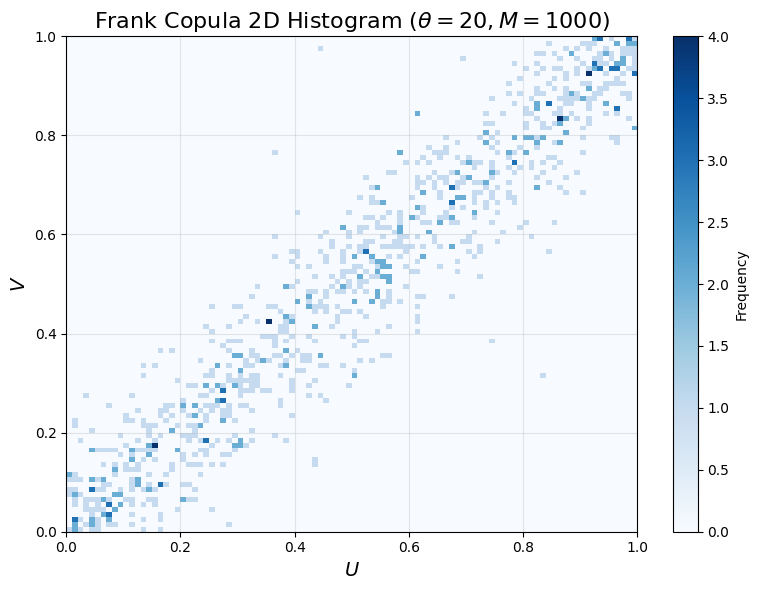

Frank Copula Sample Statistics ($\theta = 20, M = 1000$)
U Statistics:
  Mean: 0.5062, Std: 0.2907
  Min: 0.0006, Max: 0.9998
V Statistics:
  Mean: 0.5024, Std: 0.2898
  Min: 0.0004, Max: 0.9996
Joint Distribution Statistics:
  Sample Correlation: 0.9539


In [15]:
def frank_copula_comditional_sampling(M, theta) -> np.ndarray:
    """
    Parameters:
    M (int): Number of simulations
    theta (float): Frank Copula parameter
    
    Returns:
    np.ndarray: Array of shape M × 2, each row is a (U,V) sample pair
    """
    # U1 = np.random.uniform(0, 1, M)
    # U2 = np.random.uniform(0, 1, M)
    U1 = uniform.rvs(size = M)
    U2 = uniform.rvs(size = M)

    a = np.exp(-theta)
    b = np.exp(-theta * U1)
    
    numerator = U2 * (a - 1)
    denominator = b - U2 * (b - 1)
    denominator = np.where(np.abs(denominator) < 1e-10, 1e-10, denominator)
    
    inner = 1 + (numerator / denominator)
    inner = np.clip(inner, 1e-10, None)
    
    V = - (np.log(inner) / theta)
    
    return np.column_stack((U1, V))

def plot_frank_copula_samples(samples, theta, M) -> None:
    """Plot 2D histogram of Frank Copula samples"""
    
    U, V = samples[:, 0], samples[:, 1]
    
    plt.figure(figsize=(8, 6))
    hist = plt.hist2d(U, V, bins = 100, cmap = 'Blues', range = [[0, 1], [0, 1]])
    plt.colorbar(hist[3], label = 'Frequency')
    plt.xlabel('$U$', fontsize = 14)
    plt.ylabel('$V$', fontsize = 14)
    plt.title(f'Frank Copula 2D Histogram ($\\theta = {theta}, M = {M}$)', fontsize = 16)
    plt.grid(True, alpha = 0.3)
    plt.tight_layout()
    plt.show()
    
    print("=" * 50)
    print(f"Frank Copula Sample Statistics ($\\theta = {theta}, M = {M}$)")
    print("=" * 50)
    print(f"U Statistics:")
    print(f"  Mean: {np.mean(U):.4f}, Std: {np.std(U):.4f}")
    print(f"  Min: {np.min(U):.4f}, Max: {np.max(U):.4f}")
    print(f"V Statistics:")
    print(f"  Mean: {np.mean(V):.4f}, Std: {np.std(V):.4f}")
    print(f"  Min: {np.min(V):.4f}, Max: {np.max(V):.4f}")
    print(f"Joint Distribution Statistics:")
    print(f"  Sample Correlation: {np.corrcoef(U, V)[0,1]:.4f}")

M, theta = 1000, 20
samples = frank_copula_comditional_sampling(M = M, theta = theta)
plot_frank_copula_samples(samples = samples, theta = theta, M = M)


---

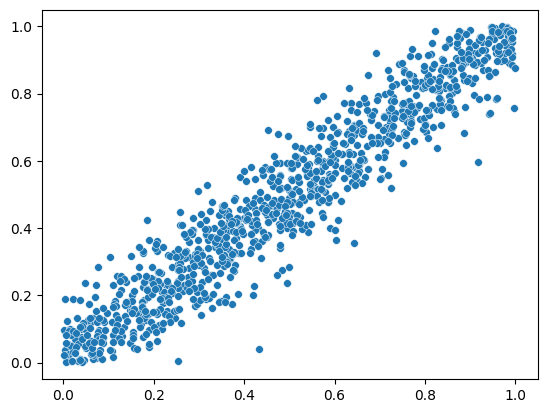

In [16]:
import numpy as np
from scipy.stats import uniform
theta = 20
M = 1000
U1 = uniform.rvs(size=M)
U2 = uniform.rvs(size=M)
U = U1
V = -1/theta * np.log( 1 + (np.exp(-theta)-1) / ( 1+np.exp(-theta*U1)*(1/U2-1) ) )

import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=U, y=V, s=125, marker=".", linewidth=0.35)
plt.show()